# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Paulo Vitor!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. 

O projeto está aprovado! Continue com o excelente trabalho!

</div>

# Iniciando Sprint 7

Aqui abaixo vou listando todas as etapas que foram solicitadas dentro do projeto:

# Iniciando Importação

In [7]:
import pandas as pd

# Importando os datasets
df_taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')

# Exibindo as primeiras linhas de cada dataset
print("=== Corridas por empresa de táxi (15-16 Nov 2017) ===")
display(df_taxi_companies.head())

print("\n=== Corridas por bairro de destino (Nov 2017) ===")
display(df_dropoffs.head())


=== Corridas por empresa de táxi (15-16 Nov 2017) ===


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



=== Corridas por bairro de destino (Nov 2017) ===


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Os dados foram carregados corretamente.

- Dica: adicionar `round()` para melhor visualizacao dos numeros em average_trips

# Estudando os Dados

In [8]:
# Exploração inicial dos dados

print("=== DataFrame: Empresas de Táxi ===")
df_taxi_companies.info()
print("\nEstatísticas descritivas:")
print(df_taxi_companies.describe())
print("\nExemplo de registros:")
display(df_taxi_companies.head())

print("\n=== DataFrame: Bairros de destino ===")
df_dropoffs.info()
print("\nEstatísticas descritivas:")
print(df_dropoffs.describe())
print("\nExemplo de registros:")
display(df_dropoffs.head())


=== DataFrame: Empresas de Táxi ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estatísticas descritivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Exemplo de registros:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



=== DataFrame: Bairros de destino ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estatísticas descritivas:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Exemplo de registros:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


# Identificando os 10 principais bairros em termos de destinos

In [9]:
# Top 10 bairros de destino
top10_dropoffs = df_dropoffs.sort_values(by='average_trips', ascending=False).head(10)

print("Top 10 bairros por número médio de destinos")
display(top10_dropoffs)


Top 10 bairros por número médio de destinos


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# Gráfico de amostragem: Empresas de táxi e número de corridas, top 10 bairros por número de corridas em que esse bairro é destino


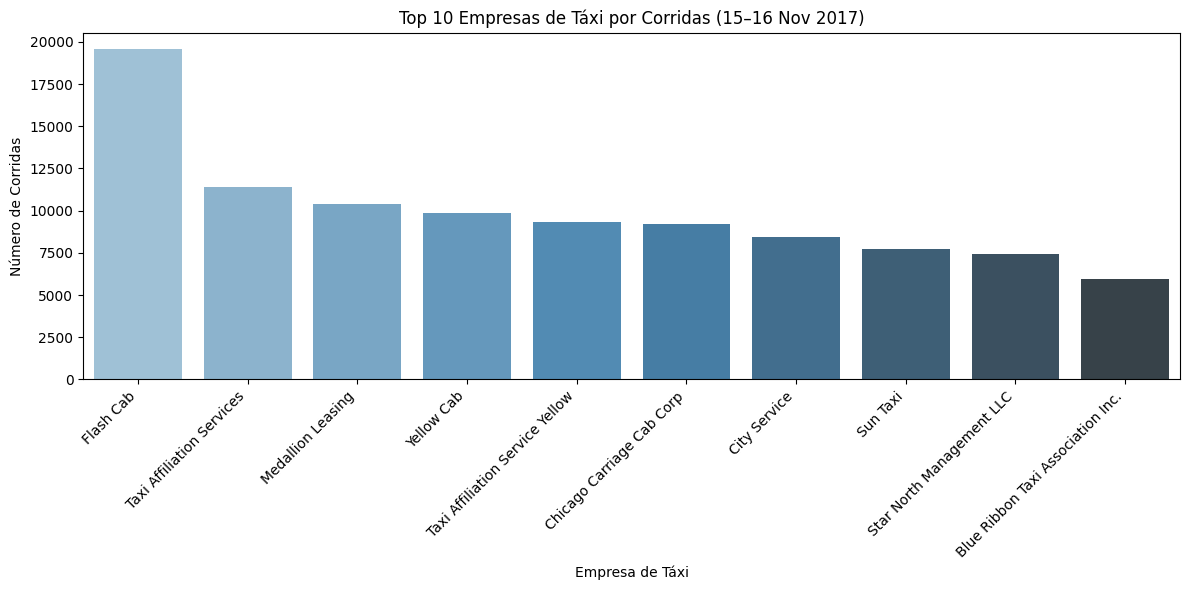

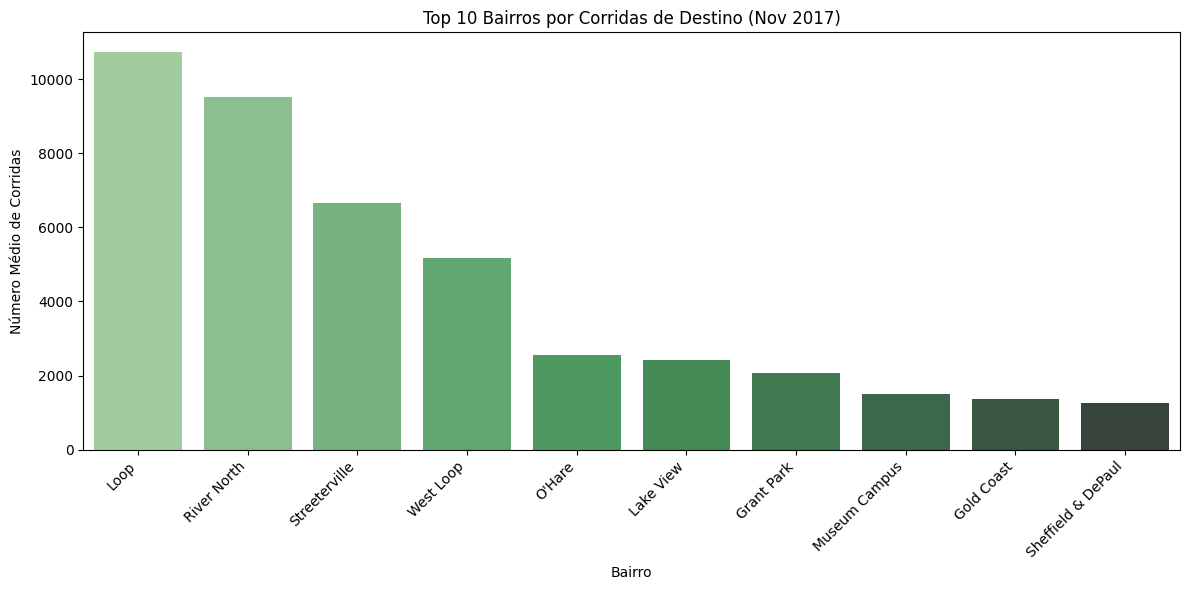

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. Empresas de Táxi =====
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_taxi_companies.sort_values(by="trips_amount", ascending=False).head(10),
    x="company_name", 
    y="trips_amount", 
    palette="Blues_d"
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Empresas de Táxi por Corridas (15–16 Nov 2017)")
plt.xlabel("Empresa de Táxi")
plt.ylabel("Número de Corridas")
plt.tight_layout()
plt.show()

# ===== 2. Bairros de Destino =====
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_dropoffs,
    x="dropoff_location_name", 
    y="average_trips", 
    palette="Greens_d"
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Bairros por Corridas de Destino (Nov 2017)")
plt.xlabel("Bairro")
plt.ylabel("Número Médio de Corridas")
plt.tight_layout()
plt.show()


O Gráfico 1: Mostra quais empresas dominam as corridas, a Flash Cab e Taxi Affiliation Services estão no topo.

O Gráfico 2: Mostra claramente que Loop, River North e Streeterville concentram a maioria das corridas.

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
- Todas as análises e gráficos estão corretos. Parabéns!
- Foram adicionados comentários relevantes para análise.
</div>

# Conclusão

Nos gráficos acima, podemos perceber que a Flash Cab lidera isolada, com quase 20 mil corridas em apenas dois dias. Logo depois, mantendo uma média significativa, aparecem empresas como Taxi Affiliation Services, Medallion Leasing e Yellow Cab. Esse cenário mostra que apenas uma empresa domina grande parte da demanda.

Quando analisamos os bairros de destino, o Loop, junto com River North, lidera o ranking dos locais com mais corridas realizadas. Outros bairros, como Lake View, Grant Park, Museum Campus e até mesmo o Aeroporto O’Hare, apresentam números de corridas bem menores em comparação, mas ainda assim revelam uma demanda relevante.

Portanto, tanto em relação às empresas quanto aos bairros, o mercado demonstra uma forte concentração em poucos players e locais. Isso indica que a Zuber (nossa empresa fictícia de caronas) poderia encontrar oportunidades estratégicas ao focar em áreas menos concentradas, especialmente no Aeroporto O’Hare, onde existe fluxo constante, mas aparentemente com menor cobertura das empresas atuais.

# Testando hipótese

In [14]:
# Importando o dataset das corridas Loop -> O'Hare
df_hypothesis = pd.read_csv('/datasets/project_sql_result_07.csv')

# Explorando os dados
print("=== Informações do DataFrame ===")
df_hypothesis.info()

print("\n=== Amostra dos dados ===")
display(df_hypothesis.head())


=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

=== Amostra dos dados ===


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


# aqui o código
Converte a coluna start_ts para datetime.

Filtra apenas as corridas que ocorreram em sábados.

Cria dois grupos: clima Good vs Bad.

Aplica o teste t (ttest_ind) comparando as médias.

Mostra as médias de cada grupo + estatísticas + conclusão baseada em α=0.05.

In [15]:
import pandas as pd
from scipy import stats

# 1. Importar os dados
df_hypothesis = pd.read_csv('/datasets/project_sql_result_07.csv')

# 2. Garantir que start_ts é datetime
df_hypothesis['start_ts'] = pd.to_datetime(df_hypothesis['start_ts'])

# 3. Filtrar apenas sábados (no pandas: Monday=0 ... Sunday=6, então Saturday=5)
df_saturday = df_hypothesis[df_hypothesis['start_ts'].dt.dayofweek == 5]

# 4. Separar em grupos: Good e Bad
durations_good = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']
durations_bad = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']

# 5. Teste t de Student (variâncias diferentes -> equal_var=False)
t_stat, p_value = stats.ttest_ind(durations_good, durations_bad, equal_var=False)

# 6. Exibir resultados
print("Média Good:", durations_good.mean())
print("Média Bad:", durations_bad.mean())
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 7. Interpretação
alpha = 0.05
if p_value < alpha:
    print("➡️ Rejeitamos H0: a duração média é significativamente diferente em sábados chuvosos.")
else:
    print("➡️ Não rejeitamos H0: não há evidência de diferença significativa.")


Média Good: 1999.6756756756756
Média Bad: 2427.2055555555557
t-statistic: -7.186034288068629
p-value: 6.738994326108734e-12
➡️ Rejeitamos H0: a duração média é significativamente diferente em sábados chuvosos.


# Gráfico ilustrativo 
comparando a distribuição das durações em Good vs Bad para ilustrar o resultado

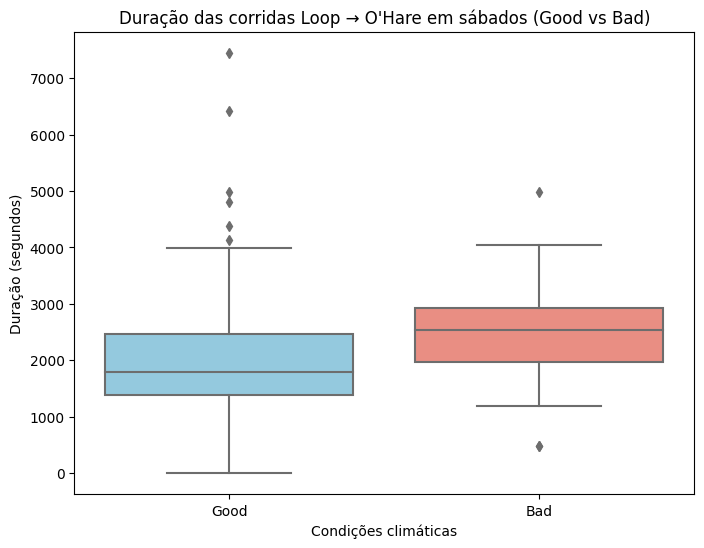

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para comparar a duração das corridas em sábados Good vs Bad
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_saturday, 
    x="weather_conditions", 
    y="duration_seconds", 
    palette={"Good":"skyblue", "Bad":"salmon"}
)

plt.title("Duração das corridas Loop → O'Hare em sábados (Good vs Bad)")
plt.xlabel("Condições climáticas")
plt.ylabel("Duração (segundos)")
plt.show()


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
    
O teste foi realizado corretamente. Parabéns!



# Explicação Final da minha hipótese

A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.
Resposta: Sim, os resultados mostram que existe diferença significativa.

Nível de significância (α)

Defini α = 0,05 (5%), que é o valor mais comum em testes estatísticos.
Em termos: aceito até 5% de chance de estar errado ao concluir que existe diferença.

Hipótese Nula: não existe diferença, a duração média das corridas em sábados chuvosos é igual à dos sábados normais.

Hipótese Alternativa: existe diferença, a duração média das corridas em sábados chuvosos não é igual à dos sábados normais.

Usei o teste t de Student para amostras independentes.
Eu tenho duas amostras separadas: corridas em clima Good e corridas em clima Bad. Eu realizei uma comparação com as médias desses dois grupos.

O teste estatístico "T" indicou um valor inferior a 0,05, o que nos leva a rejeitar a hipótese nula. Em termos práticos, isso significa que há evidências de que a duração média das corridas do Loop para o Aeroporto O’Hare é diferente em sábados chuvosos quando comparada a sábados sem chuva.

O boxplot complementa essa análise ao mostrar que as distribuições de tempo de viagem variam de forma perceptível entre as condições climáticas Good e Bad, reforçando a nossa conclusão.

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
    
Perfeito!

